# 1) Exploring CIFAR 10 dataset

In [ ]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [ ]:
# list of names of each CIFAR10 class
cifar10_class_names = {
    0:'Plane',
    1:'Car',
    2:'Bird',
    3:'Cat',
    4:'Deer',
    5:'Dog',
    6:'Frog',
    7:'Horse',
    8:'Boat',
    9:'Truck'
}

In [ ]:
# Load the entire data set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


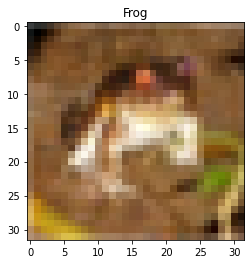

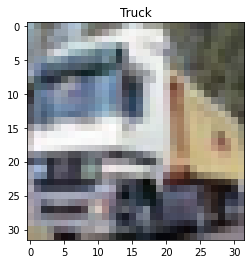

In [ ]:

# loop through the picture in the dataset
for i in range(2):
    sample_image = x_train[i] # Grab an image from the data set
    image_class_number = y_train[i][0] # Grab the image's expected class id
    image_class_name = cifar10_class_names[image_class_number] # Look up the class name from the class id
    
    # draw the image
    plt.imshow(sample_image) 
    plt.title(image_class_name)
    plt.show()

----------
# 2) Loading an image data set

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from pathlib import Path

In [3]:
# Load data set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [4]:
# Normalize data set to 0-to-1 range
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

In [5]:
# Convert class vectors to binary class matrices
# Our labels are single values from 0 to 9.
# Instead, we want each label to be an array with on element set to 1 and and the rest set to 0.
y_train = tf.keras.utils.to_categorical(x_train, 10)
y_test = tf.keras.utils.to_categorical(x_test, 10)

--------

# 3) Dense Layers

In [7]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D
from pathlib import Path

# load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

# Categorical encoding for labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [8]:
# Create model and Add layers
model = Sequential()

model.add(Dense(512, activation='relu', input_shape=(32, 32, 3))) 

model.add(Dense(10, activation='softmax')) # multiclass classification

# Summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32, 32, 512)       2048      
_________________________________________________________________
dense_1 (Dense)              (None, 32, 32, 10)        5130      
Total params: 7,178
Trainable params: 7,178
Non-trainable params: 0
_________________________________________________________________


-------


# 4) Convolution layers
+ for sound wave, it can be `1D`
+ for images, it can be `2D`

When working with Convolution Layer and Dense layer, we need to tell Keras during transition that we no longer working with 2D. So data needs to be `Flatten`.

In [9]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D
from pathlib import Path

# load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

# Categorical encoding for labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [10]:
# Create model and Add layers
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32, 32, 3))) # we want to put some padding
model.add(Conv2D(32, (3,3), activation='relu'))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))

model.add(Flatten())

model.add(Dense(512, activation='relu', input_shape=(32, 32, 3)))
model.add(Dense(10, activation='softmax')) # multiclass classification

# Summary of model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               25690624  
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

-------

# 5) Max Pooling
- max pooling is where we scale down the output of convolutional layers by keeping only the largest values and throwing away the smaller ones. This **makes the neural network more efficient**.
- we usually put Max Pooling after blocks of Convolutional layers.

In [11]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D
from pathlib import Path

# load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

# Categorical encoding for labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [12]:
# Create model and Add layers
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32, 32, 3))) # we want to put some padding
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(512, activation='relu', input_shape=(32, 32, 3)))
model.add(Dense(10, activation='softmax')) # multiclass classification

# Summary of model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)             

-------

# 6) Dropout
- one of the problems that neural networks is that they tend to memorize the input data, instead of learning how to tell diffrent objects apart. We can force the neural network to try harder to learn without memorizing the input data. 
- The idea is we'll **randomly throw away some of the data by cutting some of the connections between the layers**. This is called `Dropout.`
- usually we put dropout between right after max pooling layers, or often a group of dense layers.
- we need to pass **the percentage of neural network connections to randomly cut (value between 25% and 50% works well)**.

In [13]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D
from pathlib import Path

# load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

# Categorical encoding for labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [14]:
# Create model and Add layers
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32, 32, 3))) # we want to put some padding
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu', input_shape=(32, 32, 3)))
model.add(Dropout(0.50))

model.add(Dense(10, activation='softmax')) # multiclass classification

# Summary of model
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)         

-----

# 7) Complete neural network for image recoginition
- final step is to compile the model. When we compile it, we are telling keras that we want to create model in memory. we also tell that we want to train and measure the accuracy.
- for classification, we use `crossentroy` for loss function.
    - for binary classification, `binary_crossentropy`
    - for multi classification, `categorical_crossentropy`
- for image classification, good optimizer is `adam`: Adaptive Moment Estimation 

In [15]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D
from pathlib import Path

# load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

# Categorical encoding for labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [16]:
# Create model and Add layers
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32, 32, 3))) # we want to put some padding
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu', input_shape=(32, 32, 3)))
model.add(Dropout(0.50))

model.add(Dense(10, activation='softmax')) # multiclass classification

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Summary of model
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)         